# Gradient Descent in Logistic Regression 

Logistic Regression is a powerful and widely used classification algorithm that allows us to predict the probability of an observation belonging to a specific class. It is extensively applied in various fields such as medical diagnosis, spam detection, sentiment analysis, and more.

In this notebook we'll create a basic logistic regression from scratch.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generate simulated data
X = np.random.randn(100, 2)
y = np.zeros(100)
y = [0 if np.sum(i) >= 0 else 1 for i in X]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preview the simulated data
print(X[:5])
print(y[:5])

[[-1.89434868e+00 -6.29938059e-01]
 [-2.71538741e-01  3.74222328e-01]
 [-8.71196528e-04 -7.18860073e-01]
 [ 2.12257521e-01  7.12192708e-01]
 [-2.88555793e+00  1.20119928e+00]]
[1, 0, 1, 0, 1]


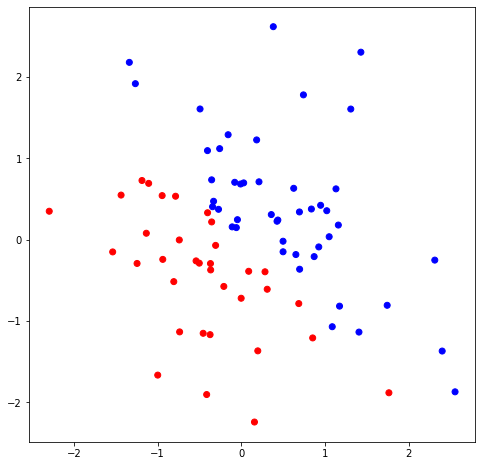

In [3]:
# Plot the simulated data and separate the classes
fig = plt.figure(figsize=(8,8))

colors = ['blue', 'red']

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

Under the hood of the logistic regression there is a sigmoid function. It plays a crucial role in transforming the raw model outputs into a probability value, which is then used to make binary classifications. 

The sigmoid function is defined as:<br><br>
$sigmoid(z) = \frac{1}{1+e^{-z}}$ <br>
<br>
where z is the linear combination of features and their corresponding weights (w*x+b – just like in linear regression)


In [4]:
# Create the sigmoid function 
def sigmoid(z):
    return 1/(1+np.exp(-z))

To train the logistic regression model, we use a cost function called the "log loss" or "cross-entropy loss", which measures the error between the predicted probabilities and the actual class labels. The goal of training is to find the optimal parameter vector θ (we'll use <i>w</i> in code below) that minimizes this cost function.

How to find the best parameters? Gradient descent is an optimization algorithm used to find the parameters that minimize the cost function. It iteratively updates the parameters in the opposite direction of the gradient of the cost function. The gradient points in the direction of the steepest increase in the cost function, so moving in the opposite direction reduces the cost. The size of a step (a change in parameters made during one iteration) depends on how steep the cost function is. It gets flatter as we get close to the function's minimum, so the steps are getting smaller – almost stopping at the lowest point.
<br><br>
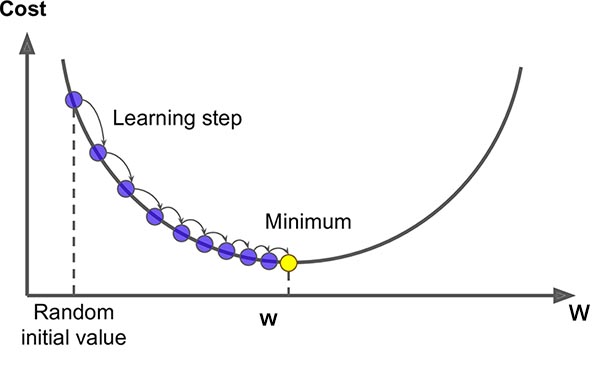

In [5]:
# Create LogisticRegression class, containing all the necessary methods
class LogisticRegression():
    
    # Initiate a class instance, specify learning rate (alpha), number of iterations, 
    # and whether to print learning info  
    def __init__(self, alpha, n_iter, print_iter=False):
        self.alpha = alpha
        self.n_iter = n_iter
        self.print_iter = print_iter
        
    # Fit the model to data, randomly initialize a starting point for gradient descent    
    def fit(self, X, y):
        m, n = X.shape
        self.w = -np.random.random(n)
        self.b = np.random.random()
        dw = db = 0
        self.history = []
        
        # Run the fitting algorithm for the specified number of iterations
        for i in range(self.n_iter):
            
            # Calculate linear predictions (z=w*x+b) and feed them into a sigmoid function
            lin_pred = np.dot(X, self.w) + self.b
            y_pred_proba = sigmoid(lin_pred)
            
            # Calculate the coefficients and bias derivatives based on a cost function
            dw = (1/m) * np.dot(X.T, (y_pred_proba - y))
            db = (1/m) * np.sum(y_pred_proba - y)
            
            # Calculate the step by multiplying the derivative by the learning rate and update the values
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db
            
            # Print actual coefficients, bias, and cost every 100 iterations
            if self.print_iter == True:
                if i % 100 == 0:
                    print(f'Iteration {i:4d}: w={self.w}; b={self.b:.5f}; cost={np.sum(dw)+db:.5f}')
                    self.history.append([self.w, self.b])
                
    # Predict the target values using previously fitted model, use standard 0.5 threshold 
    # unless specified otherwise
    def predict(self, X, threshold=0.5):
        lin_pred = np.dot(X, self.w) + self.b
        y_pred_proba = sigmoid(lin_pred)
        y_pred = [0 if y <= threshold else 1 for y in y_pred_proba]
        return y_pred

Now let's take a peek into the learning process.

In [6]:
# Create an instance of LogisticRegression class, set the learning rate to 0.01, 
# iterate 1000 times, and print learning info
clf = LogisticRegression(0.01, 1000, True)
clf.fit(X_train, y_train)

Iteration    0: w=[-0.26942466 -0.40432601]; b=0.77533; cost=0.63622
Iteration  100: w=[-0.4829659  -0.54832231]; b=0.56197; cost=0.51218
Iteration  200: w=[-0.65927924 -0.67263778]; b=0.39973; cost=0.41925
Iteration  300: w=[-0.80765776 -0.78351767]; b=0.27591; cost=0.35106
Iteration  400: w=[-0.93540598 -0.88461343]; b=0.18050; cost=0.30037
Iteration  500: w=[-1.04770635 -0.97808444]; b=0.10619; cost=0.26186
Iteration  600: w=[-1.14815991 -1.06531055]; b=0.04772; cost=0.23192
Iteration  700: w=[-1.23929387 -1.14724978]; b=0.00131; cost=0.20815
Iteration  800: w=[-1.32291987 -1.22461365]; b=-0.03581; cost=0.18892
Iteration  900: w=[-1.4003687  -1.29795712]; b=-0.06571; cost=0.17310


As you can see, the cost is getting smaller and smaller with every iteration. Let's visualize the learning process.

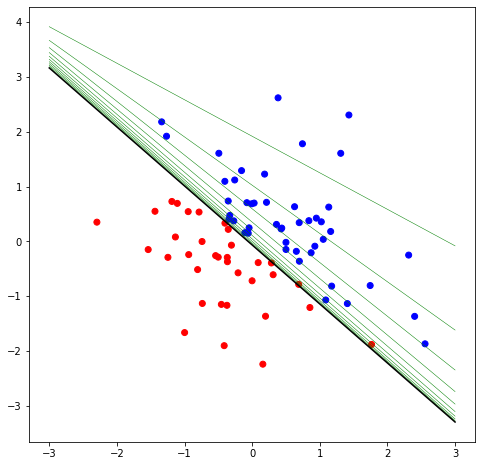

In [7]:
# Plot the generated data and gradient steps
fig = plt.figure(figsize=(8, 8))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

for i in range(len(clf.history)):
        a = -clf.history[i][0][0] / clf.history[i][0][1]
        xx = np.linspace(-3, 3)
        yy = a * xx - (clf.history[i][1]) / clf.history[i][0][1]
    
        plt.plot(xx, yy, 'g-', lw=0.5)

a = -clf.w[0] / clf.w[1]
xx = np.linspace(-3, 3)
yy = a * xx - (clf.b) / clf.w[1]

plt.plot(xx, yy, 'k-')
plt.show()

In [8]:
# Use predict method to make final predictions
y_pred = clf.predict(X_test)

# Create a function to calculate model accuracy
def accuracy(y_pred, y_test):
    tptn = []
    if len(y_pred)==len(y_test):
        tptn = [1 if y_pred[i]==y_test[i] else 0 for i in range(len(y_pred))]
    return np.sum(tptn)/len(y_pred)
        
print(f'Accuracy of our logistic regression: {accuracy(y_pred, y_test)}')

Accuracy of our logistic regression: 0.95


Now let's test the model on some real data. We'll import the breast cancer dataset from scikit-learn library, split it into train and test sets, fit the model to the data and finally predict whether the tumor is malignant or not. 

In [9]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(0.1, 1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'Coefficients: {clf.w}\n')
print(f'Bias: {clf.b}\n')
print(f'Accuracy of breast cancer logistic regression: {accuracy(y_pred, y_test)}')

Coefficients: [ 3.15426864e+01  4.11878752e+01  1.85812014e+02  7.68532847e+01
 -4.26237555e-01 -2.08905891e-01 -1.00312876e+00 -1.09244056e+00
  3.56028474e-01  2.29309944e-01 -3.59152907e-01  2.13188379e+00
 -8.37358136e-01 -8.13809152e+01 -6.49044250e-01 -8.13825077e-01
 -7.17306666e-01 -9.40254600e-01 -4.99048880e-01 -6.42324431e-02
  3.34929626e+01  5.12933237e+01  1.87074261e+02 -1.05328584e+02
 -4.22631252e-01 -1.56716104e+00 -1.51061680e+00 -7.53638208e-01
  2.49882705e-01 -2.33872322e-01]

Bias: 5.168459700078628

Accuracy of breast cancer logistic regression: 0.9473684210526315


Great! Our logistic regression algorithm works well not only with imagined, but with real data too. Bear in mind that it's a from-scratch implementation, solely for thorough understanding purposes. In practice, we'd typically use libraries like scikit-learn, as it provides many optimizations and additional features.